In [1]:
import os

base_dir = 'dogs-vs-cats/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')

train_cats_dir = os.path.join(train_dir, 'cat')
train_dogs_dir = os.path.join(train_dir, 'dog')

validation_cats_dir = os.path.join(validation_dir, 'cat')
validation_dogs_dir = os.path.join(validation_dir, 'dog')

In [2]:
train_dogs_fnames = os.listdir(train_dogs_dir)
train_cats_fnames = os.listdir(train_cats_dir)

print(train_dogs_fnames[0:1000:100])
print(train_cats_fnames[0:2000:200])

['dog.0.jpg', 'dog.1011.jpg', 'dog.1022.jpg', 'dog.10335.jpg', 'dog.10460.jpg', 'dog.10571.jpg', 'dog.10681.jpg', 'dog.10791.jpg', 'dog.10899.jpg', 'dog.11012.jpg']
['cat.0.jpg', 'cat.10216.jpg', 'cat.10443.jpg', 'cat.10667.jpg', 'cat.10891.jpg', 'cat.11109.jpg', 'cat.11342.jpg', 'cat.11567.jpg', 'cat.11792.jpg', 'cat.12011.jpg']


In [3]:
print('total number of cats :', len(train_cats_fnames))
print('total number of dogs :', len(train_dogs_fnames))

total number of cats : 10000
total number of dogs : 10000


In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

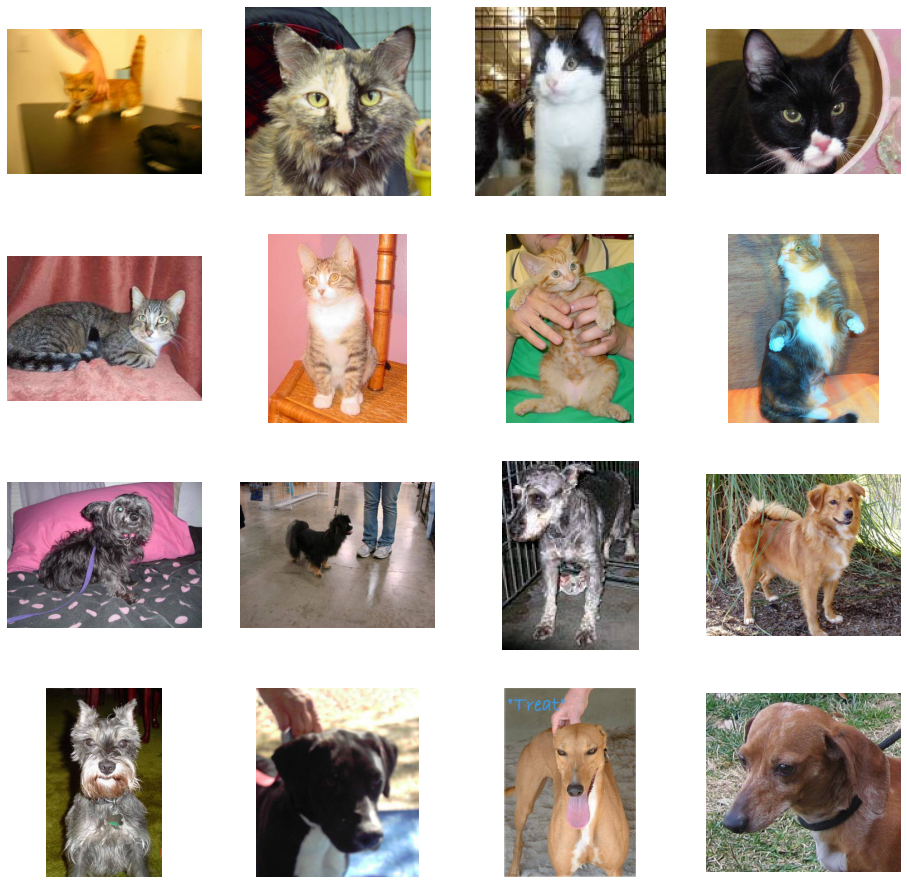

In [5]:
fig = plt.gcf()

fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_cat_pix = [os.path.join(train_cats_dir, fname)
               for fname in train_cats_fnames[pic_index-8:pic_index+8:2]]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
               for fname in train_dogs_fnames[pic_index-8:pic_index+8:2]]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

In [11]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(3, 3),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


validation_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150,150),
                                                   batch_size = 200,
                                                   class_mode = 'binary')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                             target_size = (150,150),
                                                             batch_size = 200,
                                                             class_mode = 'binary')

Found 20000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [14]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [15]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  
      epochs=100,
      validation_data=validation_generator,
      validation_steps=20,  
      verbose=1)

Epoch 1/100
100/100 [==============================] - 205s 2s/step - loss: 0.6784 - accuracy: 0.5664 - val_loss: 0.6596 - val_accuracy: 0.5982
Epoch 2/100
100/100 [==============================] - 171s 2s/step - loss: 0.6554 - accuracy: 0.6081 - val_loss: 0.6297 - val_accuracy: 0.6465
Epoch 3/100
100/100 [==============================] - 173s 2s/step - loss: 0.6436 - accuracy: 0.6275 - val_loss: 0.6189 - val_accuracy: 0.6603
Epoch 4/100
100/100 [==============================] - 168s 2s/step - loss: 0.6331 - accuracy: 0.6385 - val_loss: 0.6350 - val_accuracy: 0.6250
Epoch 5/100
100/100 [==============================] - 163s 2s/step - loss: 0.6224 - accuracy: 0.6510 - val_loss: 0.5895 - val_accuracy: 0.6842
Epoch 6/100
100/100 [==============================] - 186s 2s/step - loss: 0.6068 - accuracy: 0.6672 - val_loss: 0.6638 - val_accuracy: 0.6065
Epoch 7/100
100/100 [==============================] - 174s 2s/step - loss: 0.5925 - accuracy: 0.6823 - val_loss: 0.5688 - val_accuracy:

100/100 [==============================] - 161s 2s/step - loss: 0.3856 - accuracy: 0.8234 - val_loss: 0.3728 - val_accuracy: 0.8280
Epoch 58/100
100/100 [==============================] - 163s 2s/step - loss: 0.3859 - accuracy: 0.8257 - val_loss: 0.3203 - val_accuracy: 0.8577
Epoch 59/100
100/100 [==============================] - 164s 2s/step - loss: 0.3867 - accuracy: 0.8238 - val_loss: 0.4006 - val_accuracy: 0.8223
Epoch 60/100
100/100 [==============================] - 162s 2s/step - loss: 0.3852 - accuracy: 0.8249 - val_loss: 0.3456 - val_accuracy: 0.8460
Epoch 61/100
100/100 [==============================] - 162s 2s/step - loss: 0.3772 - accuracy: 0.8304 - val_loss: 0.3151 - val_accuracy: 0.8618
Epoch 62/100
100/100 [==============================] - 163s 2s/step - loss: 0.3790 - accuracy: 0.8278 - val_loss: 0.3110 - val_accuracy: 0.8627
Epoch 63/100
100/100 [==============================] - 163s 2s/step - loss: 0.3744 - accuracy: 0.8278 - val_loss: 0.3522 - val_accuracy: 0.840

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_dir = os.path.join(base_dir, 'test')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                 class_mode='binary',
                                                 target_size =(150,150))


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np


In [ ]:
predictions = model.predict(x=test_generator, verbose=0)

In [ ]:
cm = confusion_matrix(y_true=test_generator.classes, y_pred=np.round(predictions))

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
test_generator.class_indices

In [ ]:

cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')